# Dados Normalizados

In [1]:
%%capture

%cd ..
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from heatmap import heatmap, corrplot
import itertools

sns.set()

In [3]:
PROCESSED_DATA_FOLDER = Path('data/processed/')
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned.csv", index_col=0)
data_df["class"] = data_df["class"].astype('category')

In [4]:
normalized_dict = {}

In [5]:
normalized_dict["class"] = data_df["class"]
normalized_dict["text"] = data_df.text
normalized_dict["link"] = data_df.link
normalized_dict["category"] = data_df.category
normalized_dict["date_of_publication"] = data_df.date_of_publication
normalized_dict['tokens'] = data_df.tokens
normalized_dict['percent_words_no_punctuation'] = (data_df.words_no_punctuation/data_df.tokens) * 100
normalized_dict['percent_adjectives'] = (data_df.adjectives/data_df.tokens) * 100
normalized_dict['percent_adverbs'] = (data_df.adverbs/data_df.tokens) * 100
normalized_dict['percent_nouns'] = (data_df.nouns/data_df.tokens) * 100
normalized_dict['percent_subjuntive_imperative_verbs'] = (data_df.subjuntive_imperative_verbs/data_df.tokens) * 100
normalized_dict["types"] = data_df.types
normalized_dict['percent_links_inside'] = (data_df.links_inside/data_df.tokens) * 100
normalized_dict['percent_upper_words'] = (data_df.upper_words/data_df.tokens) * 100
normalized_dict['percent_verbs'] = (data_df.verbs/data_df.tokens) * 100
normalized_dict['percent_modal_verbs'] = (data_df.modal_verbs/data_df.tokens) * 100
normalized_dict['percent_singular_first_second_personal_pronouns'] = (data_df.singular_first_second_personal_pronouns /data_df.tokens) * 100
normalized_dict['percent_plural_first_personal_pronouns'] = (data_df.plural_first_personal_pronouns/data_df.tokens) * 100
normalized_dict['percent_pronouns'] = (data_df.pronouns/data_df.tokens) * 100
normalized_dict['pausality'] = data_df.pausality
normalized_dict['characters'] = data_df.characters
normalized_dict['average_sentence_length'] = data_df.average_sentence_length
normalized_dict['average_word_lenght'] = data_df.average_word_lenght
normalized_dict['percentage_spelling_errors'] =  data_df.percentage_spelling_errors
normalized_dict['emotiveness'] = data_df.emotiveness
normalized_dict['diversity'] = data_df.diversity

In [6]:
len(normalized_dict.keys())

26

In [7]:
normalized_df = pd.DataFrame(normalized_dict)

In [8]:
set(normalized_df.columns) - set(data_df.columns)

{'percent_adjectives',
 'percent_adverbs',
 'percent_links_inside',
 'percent_modal_verbs',
 'percent_nouns',
 'percent_plural_first_personal_pronouns',
 'percent_pronouns',
 'percent_singular_first_second_personal_pronouns',
 'percent_subjuntive_imperative_verbs',
 'percent_upper_words',
 'percent_verbs',
 'percent_words_no_punctuation'}

In [9]:
set(data_df.columns) - set(normalized_df.columns)

{'adjectives',
 'adverbs',
 'links_inside',
 'modal_verbs',
 'nouns',
 'plural_first_personal_pronouns',
 'pronouns',
 'singular_first_second_personal_pronouns',
 'subjuntive_imperative_verbs',
 'upper_words',
 'verbs',
 'words_no_punctuation'}

In [10]:
PROCESSED_DATA_FOLDER = Path('data/processed/')
normalized_df.to_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned_normalized.csv")

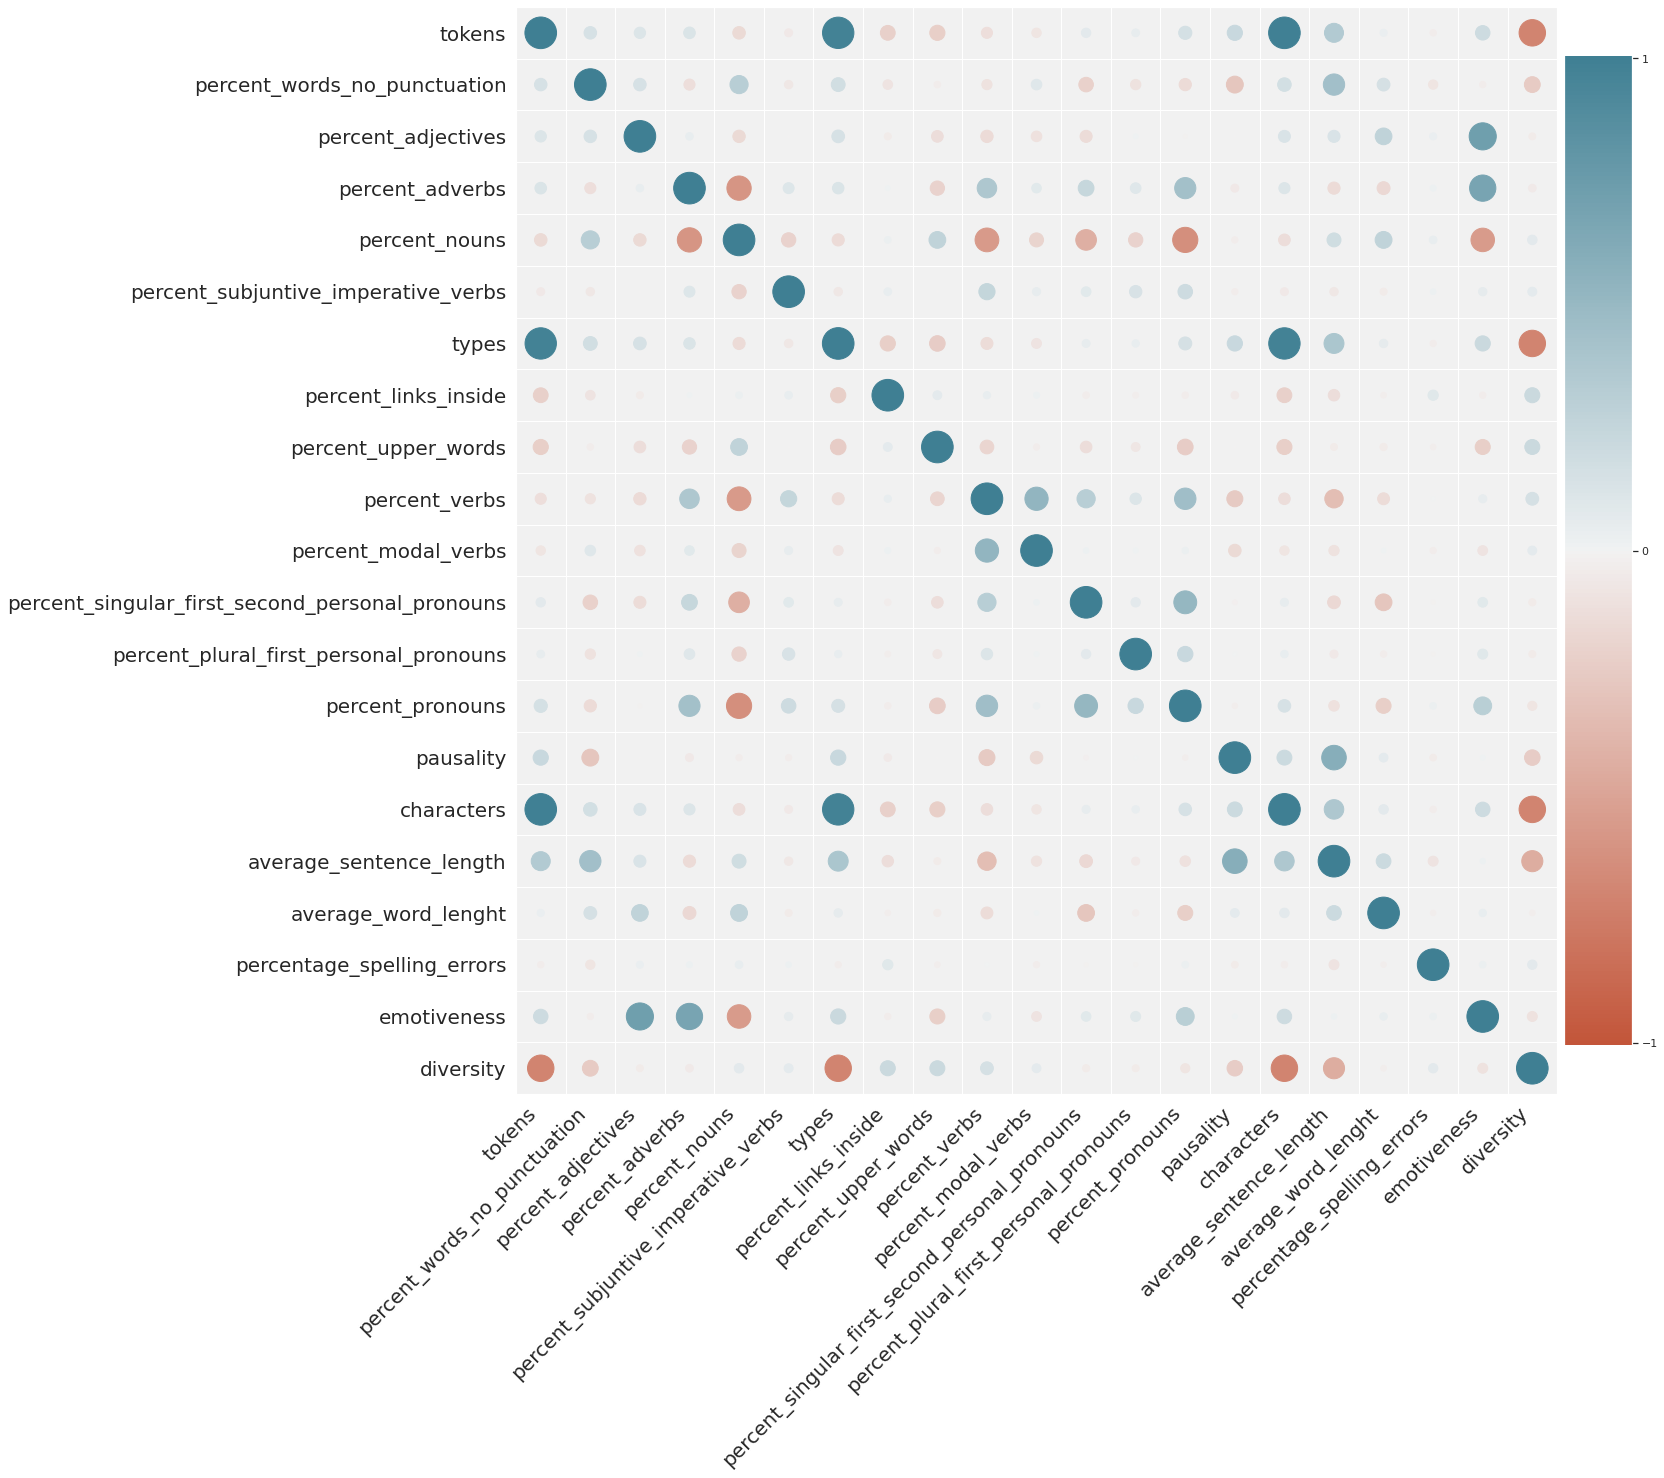

In [11]:
REPORTS_PATH = Path("reports/figures")

CONTINUOUS_VARIABLES = [x for x, y in normalized_df.dtypes.iteritems() if str(y) not in ('category', 'object')]
fig = plt.figure(figsize=(20, 20))
corrplot(normalized_df[CONTINUOUS_VARIABLES].corr(), size_scale=1000, marker='o')
fig.axes[0].tick_params(axis="x", labelsize=20)
fig.axes[0].tick_params(axis="y", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)
fig.savefig(REPORTS_PATH/'correlation_matrix_normalized.png', dpi=100)


# SAVEFIG_FOLDER = REPORTS_PATH / "boxplots"
# SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=True)


In [12]:
len(normalized_df.columns)

26

In [13]:
len(data_df.columns)

26